__**Table of Contents**__
====

>#### [1/17/2019](#1172019)
>#### [1/19/2019](#1192019)
>#### [1/25/2019](#1252019)   
&emsp;   I applied my offset function to Jeff Munn's data to demonstrate that the DDO51 photometry does not need to be recalibrated.

<a id='1172019'></a>

1/17/2019
====

>### We have been given all of Jeff Munn's obervation data.  Below I open a single observation file as a test of whether it has downloaded correctly.  Jeff included a python script for loading the H5 files in the data set.  I load the script as a module below and test some of the functions Jeff included in his readme file.

In [1]:
import basic
t = basic.Catalog.read('g17d028.006')

C:\Users\shebe\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
t.fields()

epoch                            float64                None
ra                               float64                None
e_ra                             float32                None
de                               float64                None
e_de                             float32                None
objID                            int64                  None
objInfoFlag                      int32                  None
qualityFlag                      int16                  None
nStackDetections                 int16                  None
nDetections                      int16                  None
ng                               int16                  None
g                                float32                None
e_g                              float32                None
gStd                             float32                None
gNpt                             int16                  None
gMin                             float32                None
gMax                    

In [5]:
g_extinct = t.extinction_correct('g')

In [4]:
basic.Catalog.color_color_many('g12d01*')

C:\Users\shebe\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


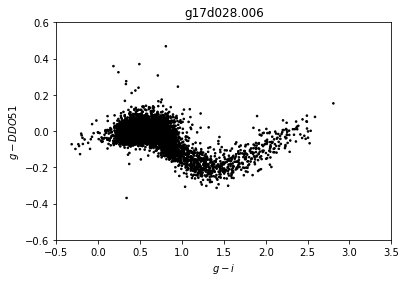

In [9]:
import matplotlib.pyplot as plt
t.color_color()
plt.show()

>### Line 77 in basic.py had to be changed to self.image = data['image'][0]

<a id='1192019'></a>

1/19/2019
====

>### Below I load another DDO51 catalog, and I will test how Jeff's calibration compares to mine.

In [10]:
#Load modules
import basic
from astropy.io import fits
import numpy as np
from astropy.table import Table

>### I will load the data as calibrated by Munn in the same color-color space I used when calibrating in November of 2018.

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


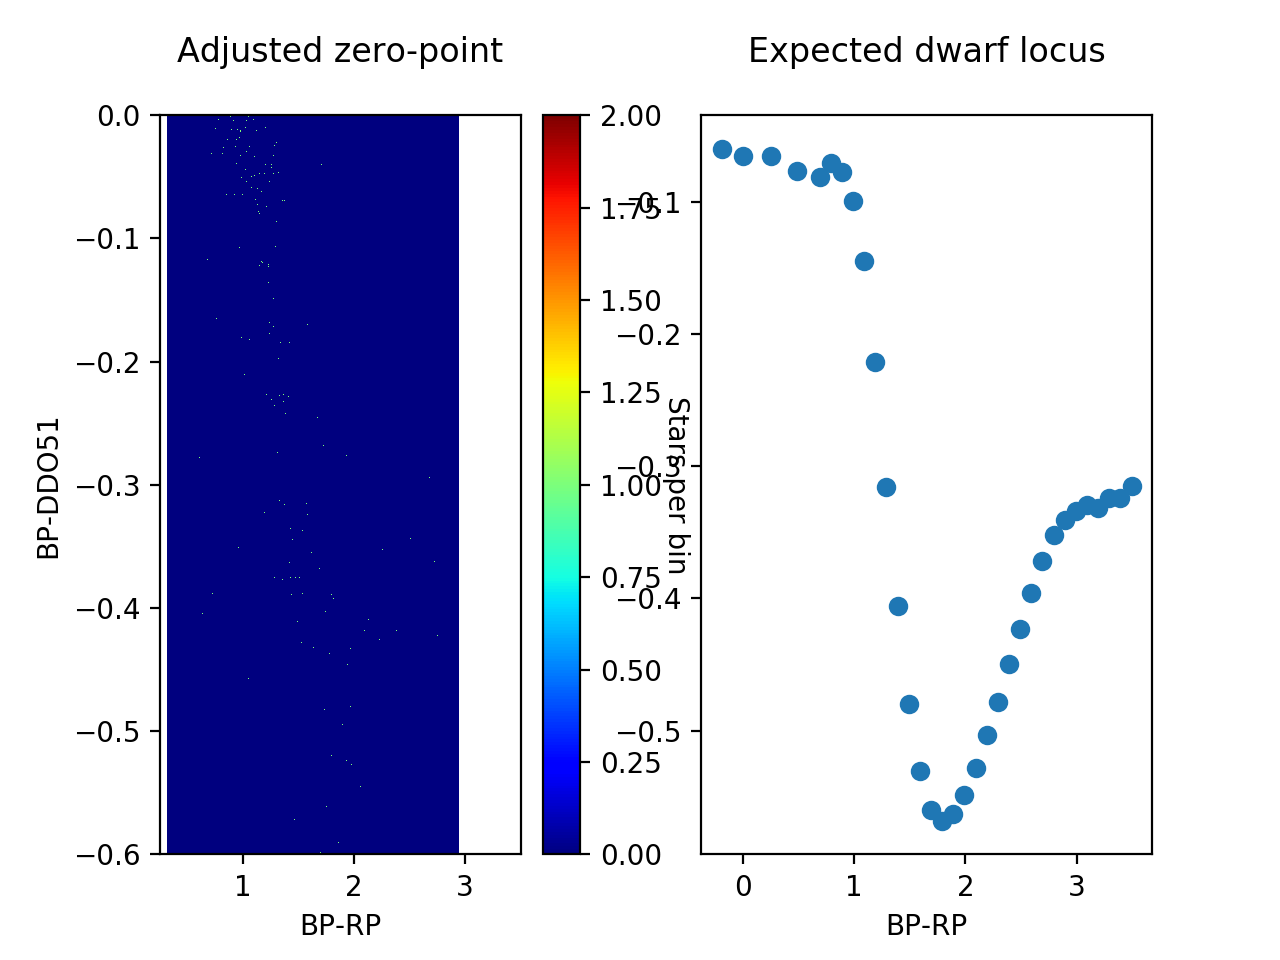

In [70]:
%matplotlib nbagg

#Load in Munn observation data
t = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.006.h5')

#Load in expected dwarf locus
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(t), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


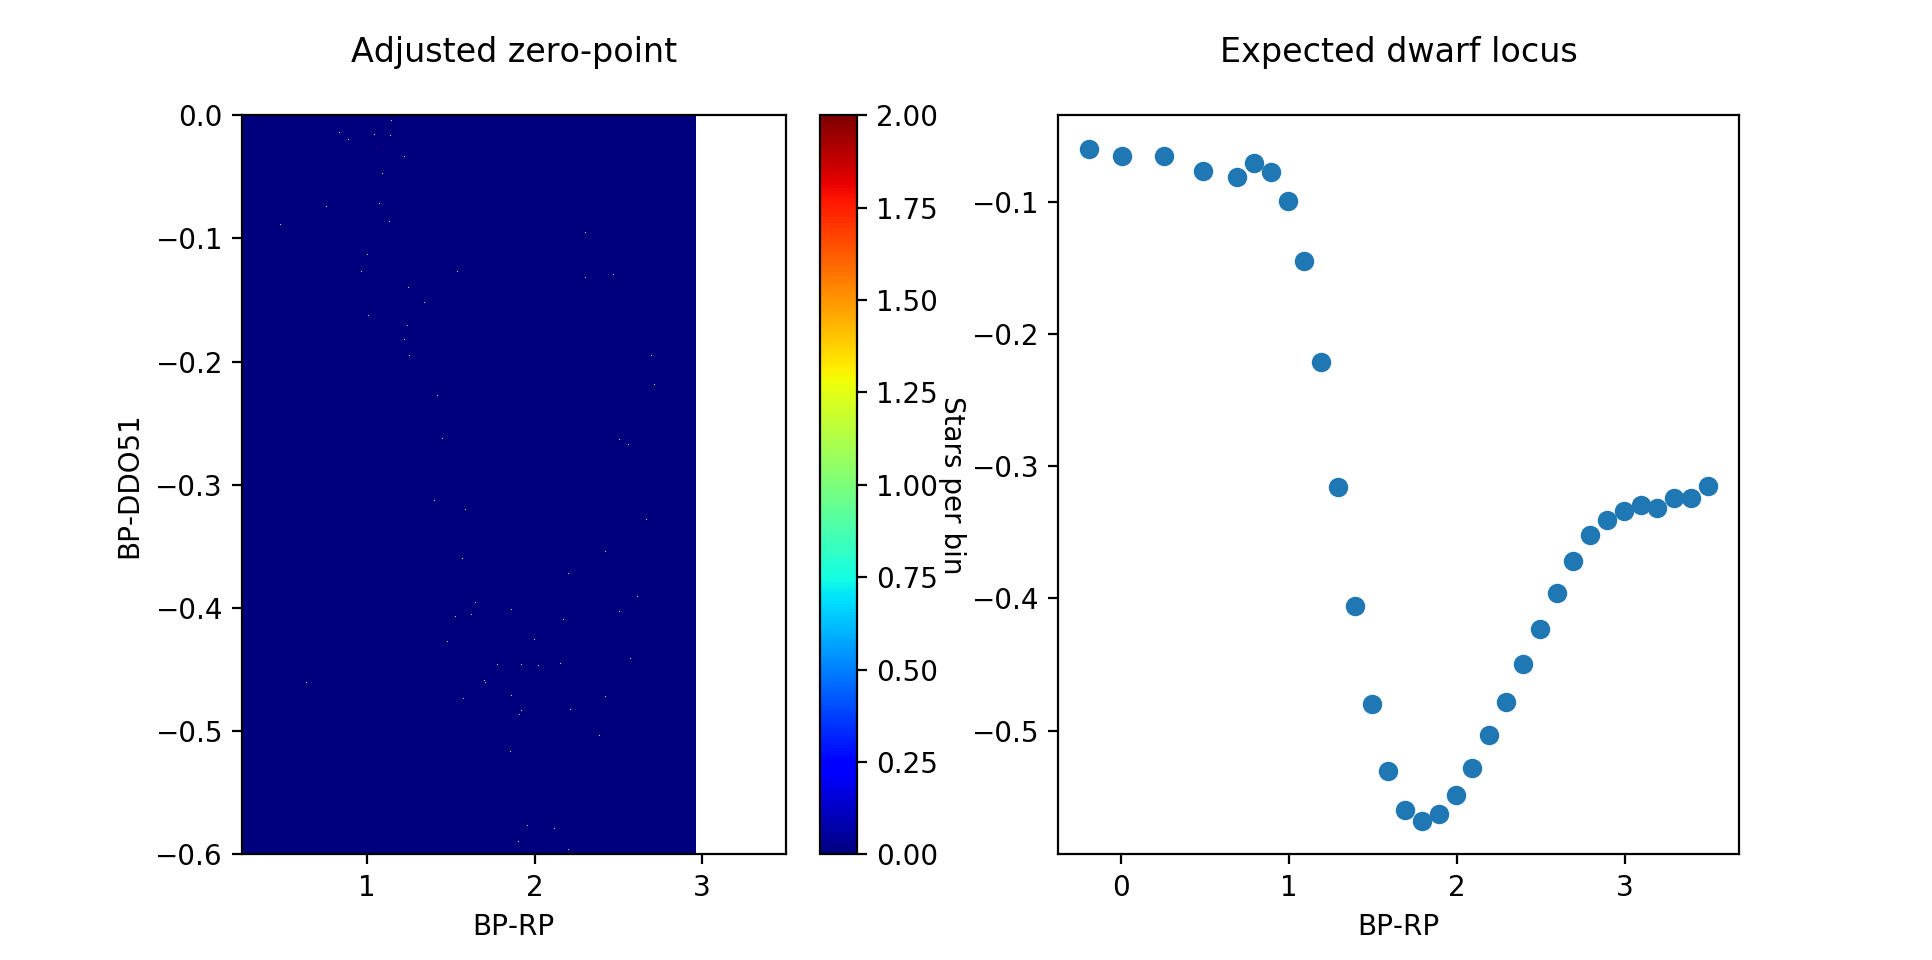

In [25]:
%matplotlib nbagg

#Load in Munn observation data
t = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.003.h5')

#Load in expected dwarf locus
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(t), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

>### It is difficult to discern a pattern with these few stars.  I will merge multiple exposures for a night into a single table and then run the same process.

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in less


<IPython.core.display.Javascript object>


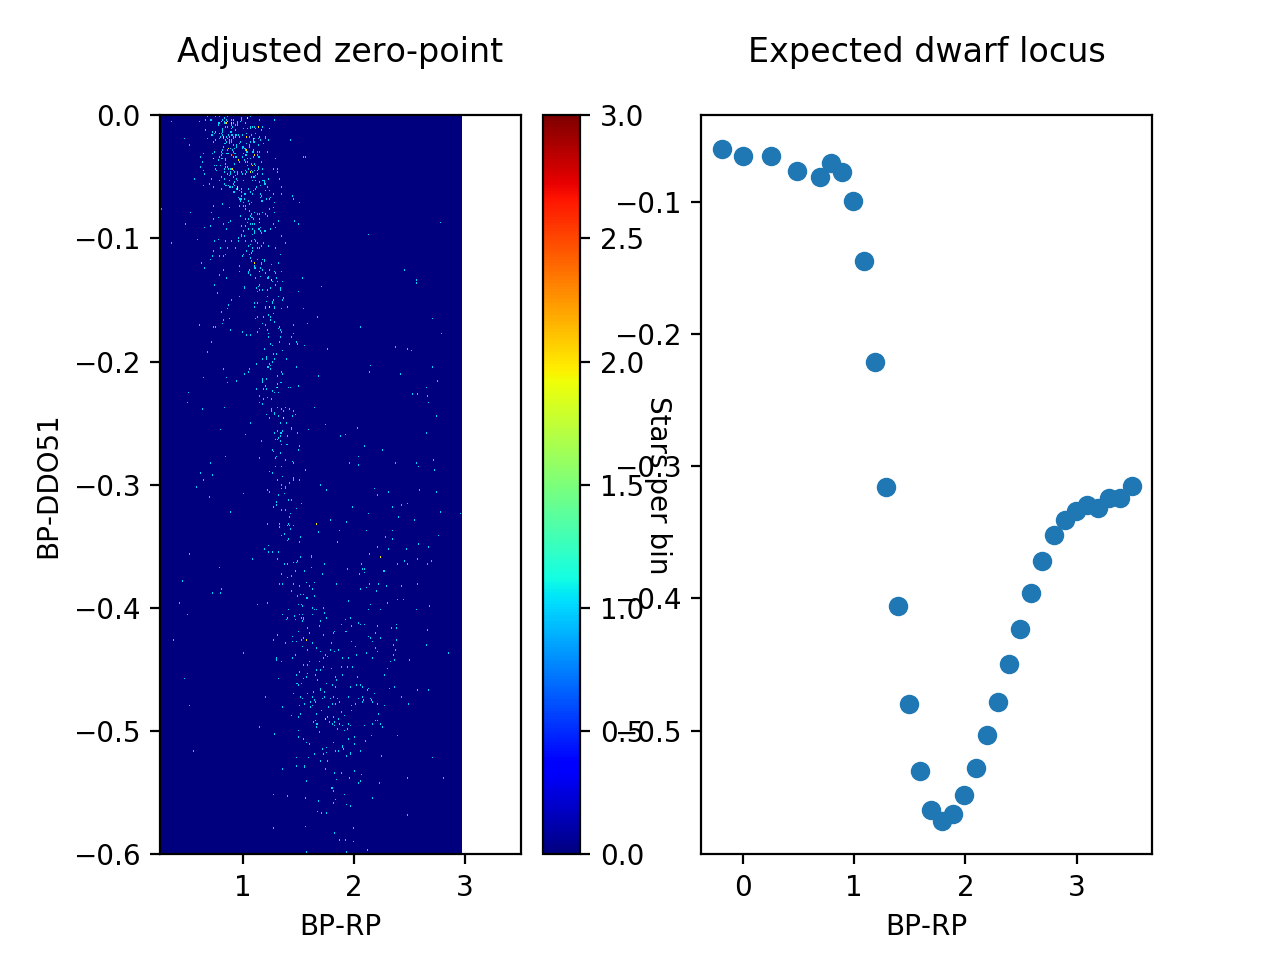

In [73]:
%matplotlib nbagg

#Load in Munn observation data
t1 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.003.h5')
t2 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.006.h5')
t3 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.007.h5')
t4 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.008.h5')
t5 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.009.h5')
t6 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.010.h5')
t7 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.011.h5')
t8 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.012.h5')
t9 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.013.h5')
t10 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.014.h5')
t11 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.015.h5')
t12 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.016.h5')

#Merge tables
t = np.concatenate((t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12))

#Load in expected dwarf locus
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot1 = np.zeros(len(t), dtype=dt)
phot1['bprp'] = bprp
phot1['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot1['bprp']<3)&(phot1['bpd']<5)&(phot1['bprp']!=0)&(phot1['bpd']!=0))
phot1 = phot1[good]

x = phot1['bprp']
y = phot1['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

>### The DDO51 photometry appears to be calibrated correctly.  I will now apply my calibration function data to the data above to see if there is any difference.

In [67]:
def calibr(cat):
    # Import modules
    from astropy.io import fits
    import numpy as np
    from astropy.table import Table

    #Loading data from night one
    z = cat
    
    #Loading dwarf locus data
    dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')
    
    #Remove all nans from photometry
    ind = np.where((~np.isnan(z['phot_bp_mean_mag']))&(~np.isnan(z['phot_rp_mean_mag']))&(~np.isnan(z['ddo51'])))
    z = z[ind]

    #Zero-point data
    #Calculate differences between photometric bands
    bprp = z['phot_bp_mean_mag']-z['phot_rp_mean_mag']
    bpd = z['phot_bp_mean_mag']-z['ddo51']

    #Create array with desired photometric data
    dt = np.dtype([('bprp',float),('bpd',float)])
    zerop = np.zeros(len(z), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd

    #Focus on values near the dwarf locus
    ind = np.where(zerop['bpd']<5)
    zerop = zerop[ind]
    hist, xedges, yedges = np.histogram2d(zerop['bprp'], zerop['bpd'], [50,50])
    ind = np.where(hist == hist.max())
    #Find the location of highest density in the locus
    x0 = xedges[ind[0]][0]
    y0 = yedges[ind[1]][0]
    good = np.where((zerop['bpd']<y0+0.15)&(zerop['bpd']>y0-0.68)&(zerop['bprp']<x0+2.17)&(zerop['bprp']>x0-0.574))

    #Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
    photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
    diff = zerop['bpd'] - photint
    m = np.mean(diff)

    #Adjusting DDO51 zero point
    mvec = [m]*len(z['ddo51'])
    z['ddo51'] += mvec

    return(z)

In [71]:
t = calibr(t)

<IPython.core.display.Javascript object>


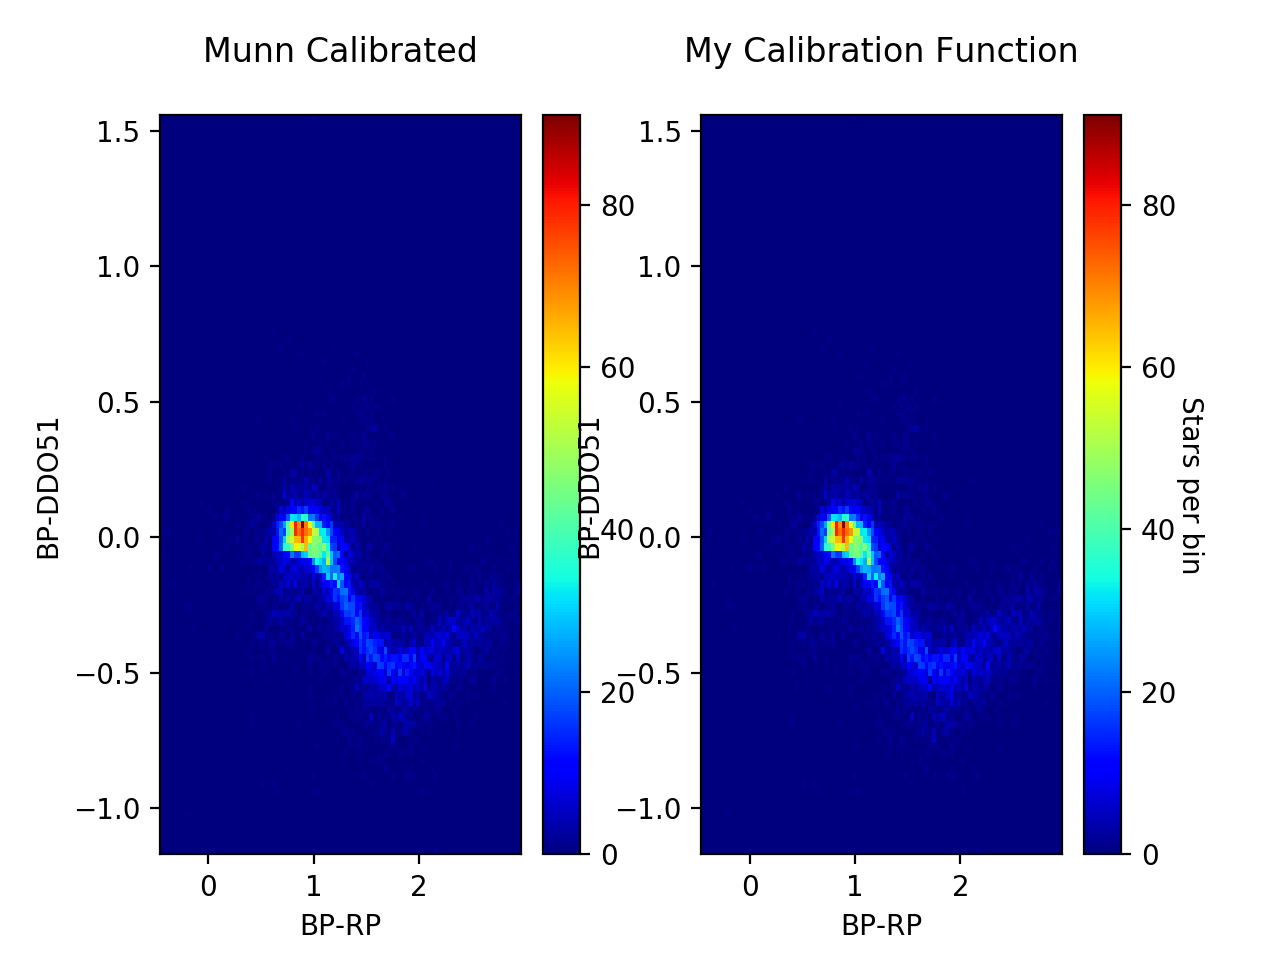

In [75]:
%matplotlib nbagg

#Calculate differences between photometric bands
bprp = t['phot_bp_mean_mag']-t['phot_rp_mean_mag']
bpd = t['phot_bp_mean_mag']-t['ddo51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot2 = np.zeros(len(t), dtype=dt)
phot2['bprp'] = bprp
phot2['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x1 = phot1['bprp']
y1 = phot1['bpd']

x2 = phot1['bprp']
y2 = phot1['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x1, y1, (100, 100), cmap=plt.cm.jet)
cbar = plt.colorbar()
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
#plt.xlim(0.25,3.5)
#plt.ylim(-0.6,0)
plt.title('Munn Calibrated', y=1.05)

plt.subplot(1, 2, 2)
plt.hist2d(x2, y2, (100, 100), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
#plt.xlim(0.25,3.5)
#plt.ylim(-0.6,0)
plt.title('My Calibration Function', y=1.05)

plt.show()

1/22/2019
====

>### I will try to load a number of Jeff's files into my offset function.

In [32]:
# Import modules
from astropy.io import fits
from astropy.table import Table
import numpy as np

###This has been adjusted for the new file type (.hd5)
#Loading data from night one
z = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.010.h5')

#loading dwarf locus data
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

###Removed intermediate variable "sub" and changed the column names to match Jeff's convention
#Zero-point data
#Calculate differences between photometric bands
bprp = z['phot_bp_mean_mag']-z['phot_rp_mean_mag']
bpd = z['phot_bp_mean_mag']-z['ddo51']

###NEW
#Remove nans from bprp and bpd
ind = np.where((bprp!='nan')&(bpd!='nan'))
z = z[ind]
bprp = bprp[ind]
bpd = bpd[ind]

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
zerop = np.zeros(len(z), dtype=dt)
zerop['bprp'] = bprp
zerop['bpd'] = bpd

#Focus on values near the dwarf locus
ind = np.where((zerop['bprp']<3)&(zerop['bpd']<3))
zerop = zerop[ind]
hist, xedges, yedges = np.histogram2d(zerop['bprp'],zerop['bpd'], [50,50])
ind = np.where(hist == hist.max())
#Find the location of highest density in the locus
x0 = xedges[ind[0]][0]
y0 = xedges[ind[1]][0]
good = np.where((zerop['bpd']<y0+0.15)&(zerop['bpd']>y0-0.68)&(zerop['bprp']<x0+2.17)&(zerop['bprp']>x0-0.574))
zerop = zerop[good]

###Removed references to fields
#Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
diff = zerop['bpd']  - photint
m = np.mean(diff)

m

C:\Users\shebe\Anaconda3\lib\site-packages\astropy\table\column.py:929: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return getattr(self.data, oper)(other)
C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in less
C:\Users\shebe\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\shebe\Anaconda3\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

In [33]:
ind

(array([ 0,  0,  0, ..., 49, 49, 49], dtype=int64),
 array([ 0,  1,  2, ..., 47, 48, 49], dtype=int64))

<a id='1252019'></a>

1/25/2019
====

>### I am revisiting the offset function work I was doing above.  I need to break it up into multiple lines to figure out why it is returning a nan.

In [88]:
# Import modules
from astropy.io import fits
from astropy.table import Table
import numpy as np

###This has been adjusted for the new file type (.hd5)
#Loading data from night one
z = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2017\g17d028\pcat\g17d028.012.h5')

#loading dwarf locus data
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

In [89]:
print(z['phot_bp_mean_mag'])
print(z['phot_rp_mean_mag'])

phot_bp_mean_mag
----------------
       17.492455
             nan
       19.646322
       20.601883
       19.627287
       20.359667
             nan
       18.759611
       19.029053
       20.141886
             ...
        16.23993
       15.357916
       18.279333
             nan
        19.18795
       18.644863
       19.959326
       17.797216
       16.895086
       17.938902
       18.007807
Length = 839 rows
phot_rp_mean_mag
----------------
       16.066385
             nan
       17.614672
       18.167618
       18.084414
        19.85744
             nan
       16.990398
       17.834934
       18.254955
             ...
       15.570517
       14.384647
       17.565271
             nan
       17.668903
       16.913757
       19.016846
       16.364828
       15.133714
        17.18247
       16.997692
Length = 839 rows


>### I need to remove the nans from both of these columns.

In [90]:
#Removing nans from Gaia BP and RP matched photometry
ind = np.isnan(z['phot_bp_mean_mag'])
tb = z['phot_bp_mean_mag']
tr = z['phot_rp_mean_mag']
dd = z['ddo51']

ind = np.where((~np.isnan(tb))&(~np.isnan(tr))&(~np.isnan(dd)))

#Remove any row with a nan in BP or RP
tb = tb[ind]
tr = tr[ind]
dd = dd[ind]

#len(tb)
#len(tr)
len(dd)

465

In [91]:
###Removed intermediate variable "sub" and changed the column names to match Jeff's convention
#Zero-point data
#Calculate differences between photometric bands
bprp = tb-tr
bpd = tb-dd

bpd
bprp

0.7720432
0.88707733
1.4235916
0.9401016
2.2031345
1.5846577
1.5846577
0.8049145
1.1773081
0.992218
0.70158577


In [92]:
#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
zerop = np.zeros(len(dd), dtype=dt)
zerop['bprp'] = bprp
zerop['bpd'] = bpd

zerop

array([(0.77204323,  8.69312286e-02), (0.88707733,  7.44495392e-02),
       (1.42359161, -3.32487106e-01), (0.94010162,  3.21807861e-02),
       (2.20313454, -4.35297012e-01), (1.58465767,  3.95416260e-01),
       (1.58465767,  3.95416260e-01), (0.80491447,  4.21104431e-02),
       (1.17730808, -3.80992889e-02), (0.99221802, -3.06892395e-03),
       (0.70158577, -2.85034180e-02), (0.79345894,  5.22537231e-02),
       (1.0925045 ,  1.17053986e-02), (0.97694588,  6.37607574e-02),
       (1.42382812, -3.76752853e-01), (2.44259262, -2.90992737e-01),
       (0.78867531,  1.68779373e-01), (0.8458252 ,  3.27129364e-02),
       (0.80041695,  2.57339478e-02), (0.73312283,  5.15651703e-02),
       (0.73490047,  3.12871933e-02), (0.88792419,  5.52616119e-02),
       (2.18138504, -3.52401733e-01), (1.03424263,  5.57975769e-02),
       (1.46252251, -3.06365967e-01), (1.18553352, -1.02691650e-02),
       (2.89863396, -3.66460800e-01), (1.13693047, -6.03370667e-02),
       (1.44624519, -3.22668076e-0

In [93]:
%matplotlib nbagg
import matplotlib.pyplot as plt

#Focus on values near the dwarf locus
ind = np.where((zerop['bprp']<3)&(zerop['bpd']<3))
zerop = zerop[ind]
zerop

array([(0.77204323,  8.69312286e-02), (0.88707733,  7.44495392e-02),
       (1.42359161, -3.32487106e-01), (0.94010162,  3.21807861e-02),
       (2.20313454, -4.35297012e-01), (1.58465767,  3.95416260e-01),
       (1.58465767,  3.95416260e-01), (0.80491447,  4.21104431e-02),
       (1.17730808, -3.80992889e-02), (0.99221802, -3.06892395e-03),
       (0.70158577, -2.85034180e-02), (0.79345894,  5.22537231e-02),
       (1.0925045 ,  1.17053986e-02), (0.97694588,  6.37607574e-02),
       (1.42382812, -3.76752853e-01), (2.44259262, -2.90992737e-01),
       (0.78867531,  1.68779373e-01), (0.8458252 ,  3.27129364e-02),
       (0.80041695,  2.57339478e-02), (0.73312283,  5.15651703e-02),
       (0.73490047,  3.12871933e-02), (0.88792419,  5.52616119e-02),
       (2.18138504, -3.52401733e-01), (1.03424263,  5.57975769e-02),
       (1.46252251, -3.06365967e-01), (1.18553352, -1.02691650e-02),
       (2.89863396, -3.66460800e-01), (1.13693047, -6.03370667e-02),
       (1.44624519, -3.22668076e-0

In [94]:
hist, xedges, yedges = np.histogram2d(zerop['bprp'],zerop['bpd'], [50,50])
ind = np.where(hist == hist.max())
zerop

print(min(hist[1]))
print(max(hist[1]))
zerop

0.0
0.0


array([(0.77204323,  8.69312286e-02), (0.88707733,  7.44495392e-02),
       (1.42359161, -3.32487106e-01), (0.94010162,  3.21807861e-02),
       (2.20313454, -4.35297012e-01), (1.58465767,  3.95416260e-01),
       (1.58465767,  3.95416260e-01), (0.80491447,  4.21104431e-02),
       (1.17730808, -3.80992889e-02), (0.99221802, -3.06892395e-03),
       (0.70158577, -2.85034180e-02), (0.79345894,  5.22537231e-02),
       (1.0925045 ,  1.17053986e-02), (0.97694588,  6.37607574e-02),
       (1.42382812, -3.76752853e-01), (2.44259262, -2.90992737e-01),
       (0.78867531,  1.68779373e-01), (0.8458252 ,  3.27129364e-02),
       (0.80041695,  2.57339478e-02), (0.73312283,  5.15651703e-02),
       (0.73490047,  3.12871933e-02), (0.88792419,  5.52616119e-02),
       (2.18138504, -3.52401733e-01), (1.03424263,  5.57975769e-02),
       (1.46252251, -3.06365967e-01), (1.18553352, -1.02691650e-02),
       (2.89863396, -3.66460800e-01), (1.13693047, -6.03370667e-02),
       (1.44624519, -3.22668076e-0

In [95]:
###Lose all entries here
#Find the location of highest density in the locus
x0 = xedges[ind[0]][0]
y0 = yedges[ind[1]][0]
good = np.where((zerop['bpd']<(y0+0.15))&(zerop['bpd']>(y0-0.68))&(zerop['bprp']<(x0+2.17))&(zerop['bprp']>(x0-0.574)))
zerop = zerop[good]

print(x0)
print(y0)
print(len(good))
good
print(zerop['bprp'])
print(zerop['bpd'])

0.8355242919921875
0.008849258422851558
1
[0.77204323 0.88707733 1.42359161 0.94010162 2.20313454 0.80491447
 1.17730808 0.99221802 0.70158577 0.79345894 1.0925045  0.97694588
 1.42382812 2.44259262 0.8458252  0.80041695 0.73312283 0.73490047
 0.88792419 2.18138504 1.03424263 1.46252251 1.18553352 2.89863396
 1.13693047 1.44624519 0.80203724 1.7900219  0.8292141  2.46902657
 0.95205879 1.51383209 0.9914608  0.83841515 0.95067692 1.30382633
 1.22921753 1.30872917 1.7100544  0.86284637 2.85862064 0.99701595
 1.22628975 2.21047401 1.14846992 2.4698391  1.16938019 0.74644184
 0.81817055 1.31702614 0.74143028 0.48600769 0.88272858 0.78554344
 1.27539158 2.84230804 1.26534081 1.17453575 1.13024139 0.52629089
 1.12747383 2.3711853  1.69815063 0.97975636 0.82650471 1.2031002
 0.98358536 0.79722691 1.13302803 1.60722923 1.48191833 1.44164467
 1.34487724 0.99878693 2.13120461 1.10205269 0.7214222  0.79919434
 0.87433529 0.99198723 2.56376362 0.80953789 1.30386925 1.53497505
 0.80582047 0.9074287

In [96]:
###Removed references to fields
#Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
diff = zerop['bpd']  - photint
m = np.mean(diff)

np.std(diff)/np.sqrt(len(diff))

#m

0.0036899206874117297

<a id='1272019'></a>

1/27/2019
====

>### David asked me to construct an array with the mean offset of a large number of the hd5 files as done above for a single file.  I work on constructing this below.  I re-ran the code above, and I will add code to assign the entry to ablank array.

In [60]:
#Counting number of files in a directory.  This will be used to create a blank array for mean offsets.
import os, os.path

path, dirs, files = next(os.walk(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2016\g16d012\pcat"))
len(files)

24

In [108]:
#The variable dirs contains the names of all the folders containing hd5 files.  
#This can be referenced during construction of the array

file = np.array(files)
mean = np.zeros(len(dirs))
col1 = fits.Column(name='file', format='A15', array=file)
col2 = fits.Column(name='mean', format='D05', unit='DN', array=mean)
coldefs = fits.ColDefs([col1, col2])
moff = fits.BinTableHDU.from_columns(coldefs)
moff.data['file']

chararray(['g16d012.007.h5', 'g16d012.008.h5', 'g16d012.009.h5',
           'g16d012.010.h5', 'g16d012.011.h5', 'g16d012.012.h5',
           'g16d012.013.h5', 'g16d012.014.h5', 'g16d012.015.h5',
           'g16d012.019.h5', 'g16d012.020.h5', 'g16d012.021.h5',
           'g16d012.022.h5', 'g16d012.023.h5', 'g16d012.024.h5',
           'g16d012.025.h5', 'g16d012.026.h5', 'g16d012.027.h5',
           'g16d012.028.h5', 'g16d012.031.h5', 'g16d012.032.h5',
           'g16d012.033.h5', 'g16d012.034.h5', 'g16d012.035.h5'],
          dtype='<U15')

In [111]:
#For loop to append mean offsets to array for each file
for i in files:
    #Loading data from night one
    z = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\2016\g16d012\pcat\{0}'.format(i))

    #loading dwarf locus data
    dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

    #Removing nans from Gaia BP and RP matched photometry
    ind = np.isnan(z['phot_bp_mean_mag'])
    tb = z['phot_bp_mean_mag']
    tr = z['phot_rp_mean_mag']
    dd = z['ddo51']
    ind = np.where((~np.isnan(tb))&(~np.isnan(tr))&(~np.isnan(dd)))

    #Remove any row with a nan in BP or RP
    tb = tb[ind]
    tr = tr[ind]
    dd = dd[ind]
    
    #Zero-point data
    #Calculate differences between photometric bands
    bprp = tb-tr
    bpd = tb-dd
    dt = np.dtype([('bprp',float),('bpd',float)])
    zerop = np.zeros(len(dd), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd
    
    #Focus on values near the dwarf locus
    ind = np.where((zerop['bprp']<3)&(zerop['bpd']<3))
    zerop = zerop[ind]
    hist, xedges, yedges = np.histogram2d(zerop['bprp'],zerop['bpd'], [50,50])
    ind = np.where(hist == hist.max())
    
    #Find the location of highest density in the locus
    x0 = xedges[ind[0]][0]
    y0 = yedges[ind[1]][0]
    good = np.where((zerop['bpd']<(y0+0.15))&(zerop['bpd']>(y0-0.68))&(zerop['bprp']<(x0+2.17))&(zerop['bprp']>(x0-0.574)))
    zerop = zerop[good]
    
    photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
    diff = zerop['bpd']  - photint
    m = np.mean(diff)
    loc = np.where(moff.data['file']==i)
    moff.data['mean'][loc] = m


In [112]:
moff.data['mean']

array([0.07927295, 0.07837938, 0.09889587, 0.09816044, 0.10042803,
       0.1015642 , 0.19857905, 0.09871295, 0.2010156 , 0.53765989,
       0.12755207, 0.08111555, 0.09929813, 0.06851155, 0.07918695,
       0.0860759 , 0.07286387, 0.0849584 , 0.06307674, 0.04997799,
       0.06113219, 0.04159769, 0.06024055, 0.03881867])

>### This appears to have worked for a single night.  I now want to create nested for loops to run this on all nights.

In [140]:
#Counting number of files in a directory and a list of all hd5 file names.  This will be used to create a blank array for mean offsets.
import os, os.path

path, dirsyear, files = next(os.walk(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51"))

nights = []

for i in dirsyear:
    path, dirsnight, files = next(os.walk(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\{0}".format(i)))
    for j in dirsnight:
        path, dirs, filesnight = next(os.walk(r"C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\{0}\{1}\pcat".format(i,j)))
        nights += filesnight


In [138]:
nights

['g11d302.010.h5',
 'g11d302.011.h5',
 'g11d302.012.h5',
 'g11d302.013.h5',
 'g11d302.014.h5',
 'g11d302.015.h5',
 'g11d302.016.h5',
 'g11d302.019.h5',
 'g11d302.020.h5',
 'g11d302.021.h5',
 'g11d302.022.h5',
 'g11d302.023.h5',
 'g11d302.024.h5',
 'g11d302.025.h5',
 'g11d302.026.h5',
 'g11d302.027.h5',
 'g11d302.028.h5',
 'g11d302.029.h5',
 'g11d302.030.h5',
 'g11d302.031.h5',
 'g11d302.032.h5',
 'g11d302.033.h5',
 'g11d302.034.h5',
 'g11d302.035.h5',
 'g11d302.036.h5',
 'g11d302.037.h5',
 'g11d303.002.h5',
 'g11d303.003.h5',
 'g11d303.004.h5',
 'g11d303.005.h5',
 'g11d303.006.h5',
 'g11d303.007.h5',
 'g11d303.008.h5',
 'g11d303.009.h5',
 'g11d303.010.h5',
 'g11d303.011.h5',
 'g11d303.012.h5',
 'g11d303.013.h5',
 'g11d303.014.h5',
 'g11d303.015.h5',
 'g11d303.016.h5',
 'g11d303.017.h5',
 'g11d303.018.h5',
 'g11d303.019.h5',
 'g11d303.020.h5',
 'g11d303.021.h5',
 'g11d303.022.h5',
 'g11d303.023.h5',
 'g11d303.024.h5',
 'g11d303.025.h5',
 'g11d303.026.h5',
 'g11d303.027.h5',
 'g11d303.02

In [142]:
###REPEAT with all hd5 files
#The variable dirs contains the names of all the folders containing hd5 files.  
#This can be referenced during construction of the array

files = np.array(nights)
mean = np.zeros(len(nights))
col1 = fits.Column(name='file', format='A15', array=file)
col2 = fits.Column(name='mean', format='D05', unit='DN', array=mean)
coldefs = fits.ColDefs([col1, col2])
moff = fits.BinTableHDU.from_columns(coldefs)
len(moff.data['file'])

7258

In [149]:
nights[1][0:7]

'g11d302'

In [ ]:
#For loop to append mean offsets to array for each file
for i in nights:
    #Loading data from night one
    z = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\20{0}\{1}\pcat\{2}'.format(i[1:3],i[0:7],i))

    #loading dwarf locus data
    dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')

    #Removing nans from Gaia BP and RP matched photometry
    ind = np.isnan(z['phot_bp_mean_mag'])
    tb = z['phot_bp_mean_mag']
    tr = z['phot_rp_mean_mag']
    dd = z['ddo51']
    ind = np.where((~np.isnan(tb))&(~np.isnan(tr))&(~np.isnan(dd)))

    #Remove any row with a nan in BP or RP
    tb = tb[ind]
    tr = tr[ind]
    dd = dd[ind]
    
    #Zero-point data
    #Calculate differences between photometric bands
    bprp = tb-tr
    bpd = tb-dd
    dt = np.dtype([('bprp',float),('bpd',float)])
    zerop = np.zeros(len(dd), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd
    
    #Focus on values near the dwarf locus
    ind = np.where((zerop['bprp']<3)&(zerop['bpd']<3))
    zerop = zerop[ind]
    hist, xedges, yedges = np.histogram2d(zerop['bprp'],zerop['bpd'], [50,50])
    ind = np.where(hist == hist.max())
    
    #Find the location of highest density in the locus
    x0 = xedges[ind[0]][0]
    y0 = yedges[ind[1]][0]
    good = np.where((zerop['bpd']<(y0+0.15))&(zerop['bpd']>(y0-0.68))&(zerop['bprp']<(x0+2.17))&(zerop['bprp']>(x0-0.574)))
    zerop = zerop[good]
    
    photint = np.interp(zerop['bprp'],dat['BPRP'],dat['BPD'])
    diff = zerop['bpd']  - photint
    m = np.mean(diff)
    loc = np.where(moff.data['file']==i)
    moff.data['mean'][loc] = m


<a id='1282019'></a>

1/28/2019
====

>### I am going to plot a histogram of the array I created.

<IPython.core.display.Javascript object>


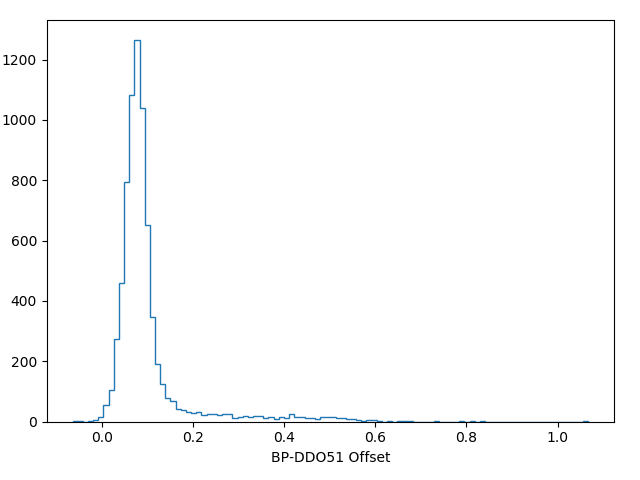

In [4]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib nbagg

#Load data
t = np.load(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\DDO51\moffsets.npy')

#Remove outliers
ind = np.where(t['mean']>-2)
t = t[ind]

#Define variable for plot/figure
fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('BP-DDO51 Offset')
plt.tight_layout()

x = ax.hist(t['mean'], histtype='step', bins=100, normed=False)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels)
plt.show()